Aproximace svačinového sáčku jako kvádr (pro aproximaci objemu)
23 x 13 x 2,5 cm^3 = cca 0.00075076 cm^2


Odhadujeme optimální polohu míčků 1/4 od kraje (1/2 mezi nimi)
- Aby se navzájem neovlivňovali, ale zároveň se ovlivnil co nejvíc vzduchu

míčky
- zelený (malý) m = 0,0084 kg
- zelený (velký) m = 0,0474 kg
- duha (malý) m = 0,0101 kg
- duha (velký) m = 0,0268 kg
- modrý m = 0,0505 kg
- Zlatý m = 0,0199 kg
- Ještěrka m = 0,0381 kg

Prkno má šířku 9,8 cm
- Sice takhle nepokryje celou polovinu, ale je tam dost místa na to, aby dopad neovlinil míček prohloubením
- Takhle plocha dopadu 9,8 x 13 cm^2 = 0,1274
- Výška prkna = 0,017 cm
- Délka celého prkna = 0,70 cm

Měření plochy míče jako píst
- S = $dV/dy$
- dV změříme přes položené prkno dřeva a změna úhlu
- 40 páka 30 extra


V simulaci zanedbáváme gravitační zrychlení (je to do určitý míry zanedbatelný, protože i pro m1=m2, je zrychlení málokdy menší než gravitační a věci lol).
Také přidáme počítání síly, což je jenom $F = m\cdot d2y$, ale ještě tu započteme gravitační zrychlení, takže $F = m \cdot (d2y-g)$.
Z tohole můžeme říct, že objekt $y$ bude letět/ve vzduchu, když $F = 0$, což je jenom když $d2y = g$.
Protože ta simulace pístů by měla končit potom, co $y$ letí, takže v momentě když $d2y < g$, přejdeme k další části simulaci.

Další poznámka - S1 a S2 by měli obě být podle té funkce. Jestli má být jeden z nich (nebo oba) konstantní, tak ta konstanta musí být nějaká rozumná konstanta, která je největší possible plocha objektu, který působí na vak (což je pro náš sváček od svačiny 0.1274 m^2)
- Pozor, sice jsme řekli, že hmotnost neovlivňuje plochu, ale potřebuješ rozumně velkou hmotnost (>2kg) pro 0.1274 m^2, aby byl graf hezký

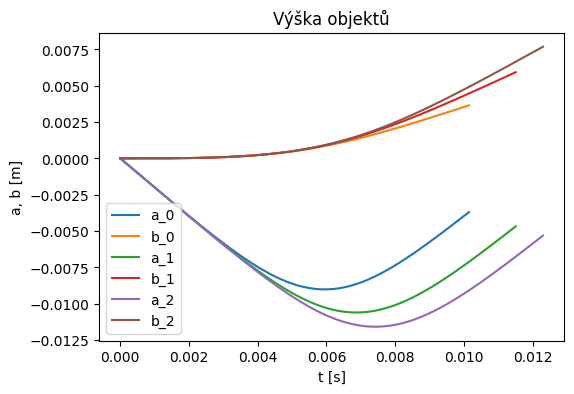

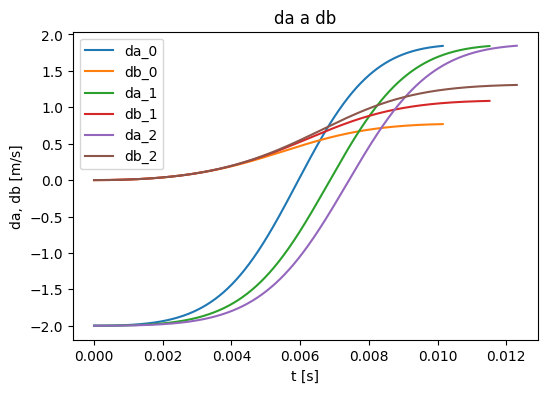

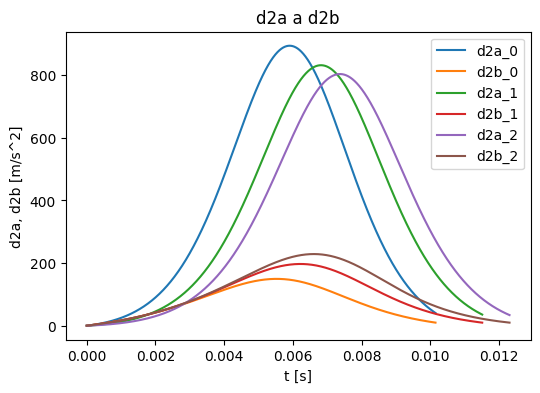

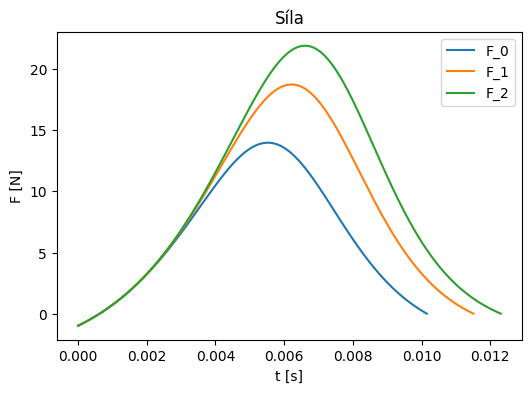

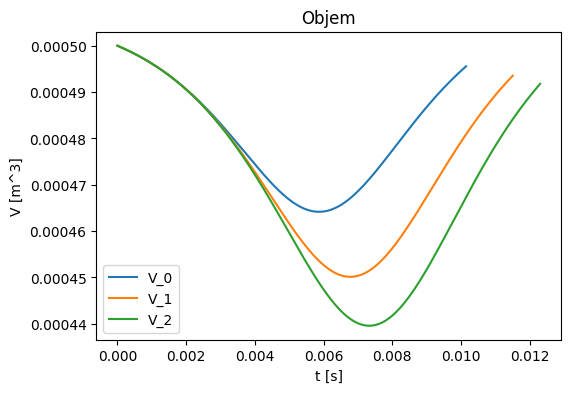

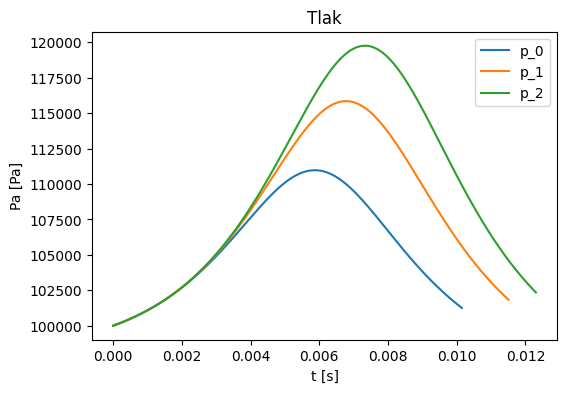

In [4]:
import matplotlib.pyplot as plt

data = []

def S1(y): # m^2
    return -302674.46009723126*y**5 + 34648.184196148315*y**4 -1485.0267784666878*y**3 + 30.14485910394613*y**2 + -0.3090481585038474*y + 0.0015738826330228774
    return 0.13

def S2(y): # m^2
    return -302674.46009723126*y**5 + 34648.184196148315*y**4 -1485.0267784666878*y**3 + 30.14485910394613*y**2 + -0.3090481585038474*y + 0.0015738826330228774
    return 0.13

# Default values
m1 = 0.2 # kg
m2 = 0.1 # kg
initV = 0.0005 # m^3
initp = 100000 # Pa
v0 = -2 # m/s

def instance(m1 = m1, m2 = m2, initV = initV, initp = initp, v0 = v0):
    instanceData = [[], [], [], [], [], [], [], [], [], [], []]
    # t, a, da, d2a, b, db, d2b, V, p, S1, S2, F
    # 0, 1,  2,   3, 4,  5,   6, 7, 8,  9, 10, 11

    K = 1.4 # konstanta
    dt = 0.000005 # s

    pastPeak = False
    # Parameters
    # Začátek = moment nárazu

    V = initV # m^3
    p = initp # Pa
    t = 0 # s
    a = 0 # m    objekt, který naráží
    da = v0 # da/dt
    d2a = (p-initp)*S1(a) # d2a/d2t
    b = 0 # m   objekt, který letí
    db = 0 # db/dt
    d2b = (p-initp)*S2(b) # d2b/d2t
    
    values = [t, a, da, d2a, b, db ,d2b, V, p, S1(a), S2(b)]
    for i in range(len(values)): instanceData[i].append(values[i])
    
    while (d2b > 9.81 or not pastPeak):
        values = [t, a, da, d2a, b, db ,d2b, V, p, S1(a), S2(b)]
        for i in range(len(values)): instanceData[i].append(values[i])

        olda = a
        oldb = b
        oldV = V

        t = round(t+dt, 12)
        a = round(a+da*dt, 12)
        da = round(da+d2a*dt, 12)
        d2a = round((p-initp)*S1(a)/m1, 12)

        b = round(b+db*dt, 12)
        db = round(db+d2b*dt, 12)
        d2b = round((p-initp)*S2(b)/m2, 12)

        V = round(V+(a-olda)*S1(a) + (b-oldb)*S2(b), 12)
        p = round(p*pow(oldV/V, K), 12)
        if p > 105000:
            pastPeak = True
    force = []
    for x in instanceData[6]:
        force.append(m2*(x-9.81))
    instanceData.append(force)

    return instanceData

data.append(instance(m1 = 0.1, m2 = 0.1))
# data.append(instance(m1 = 0.4, m2 = 0.4))
data.append(instance(m1 = 0.2, m2 = 0.1))
data.append(instance(m1 = 0.3, m2 = 0.1))
# data.append(instance(m1 = 0.4, m2 = 0.1))


plt.rcParams['figure.figsize'] = [6, 4]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], label = f"a_{i}")
    plt.plot(data[i][0], data[i][4], label = f"b_{i}")
    plt.title("Výška objektů")
    plt.ylabel("a, b [m]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][2], label = f"da_{i}")
    plt.plot(data[i][0], data[i][5], label = f"db_{i}")
    plt.title("da a db")
    plt.ylabel("da, db [m/s]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][3], label = f"d2a_{i}")
    plt.plot(data[i][0], data[i][6], label = f"d2b_{i}")
    plt.title("d2a a d2b")
    plt.ylabel("d2a, d2b [m/s^2]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][11], label = f"F_{i}")
    plt.title("Síla")
    plt.ylabel("F [N]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][7], label = f"V_{i}")
    plt.title("Objem")
    plt.ylabel("V [m^3]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][8], label = f"p_{i}")
    plt.title("Tlak")
    plt.ylabel("Pa [Pa]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    with open(f"./outData/data_{i}.csv", 'w') as file:
        file.write("t,x,dx,d2x,y,dy,d2y,p,V,S1,S2,F\n")
        for line in range(len(data[i][0])):
            file.write(",".join([str(x[line]) for x in data[i]]))
            file.write("\n")